<a href="https://colab.research.google.com/github/ShawnLiu119/Dynamic-Pricing-AirlineTicket/blob/main/Dynamic_pricing_airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML-based Dynamic Pricing - Airline Tickets**

reference:https://ngugijoan.medium.com/pricing-on-point-the-art-and-science-of-dynamic-pricing-dd543bf80f01
### Input
*   online data - ticket search
*   offline data - histroical purchase

### Approach

1.   **Objective Function**: Define an objective function that captures your business goal. For example, if your goal is to maximize revenue, the objective function could be the total revenue generated from selling tickets to customers.
2.   **Constraints**: These are real-world limitations or requirements that must be considered when determining optimal prices. These constraints could include pricing rules (e.g., minimum and maximum prices for tickets), inventory availability(number of seats left), days left before travel, and any other business-specific constraints.
3.   **Optimization**: Use an optimization algorithm to find the optimal prices that maximize the objective function while satisfying the constraints.
4.   **Implementation**: Implement the optimization algorithm in code, using the predicted prices as inputs.
5.   **Validation and Refinement**: Validate the optimization logic using historical data or simulations. Refine the model as necessary to improve performance.

### MLOPs consideration


1.   Scalability and Performance: Design the dynamic pricing solution to handle large volumes of data and accommodate growing demand over time. Ensure scalability by using robust infrastructure, scalable algorithms, and parallel processing techniques to handle increased workload and maintain optimal performance.
2. Monitoring and Maintenance: Establish monitoring processes and KPIs to track the performance of the dynamic pricing system continuously. Monitor key metrics such as revenue, profitability, pricing accuracy, and customer satisfaction to identify any issues or opportunities for improvement.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

import os

In [5]:
folder = "/content/drive/MyDrive/kaggle_data/airline_ticket"
# file = "flight_data.csv"
# file = 'Cleaned_dataset.csv'
file = 'Scraped_dataset.csv'
path = os.path.join(folder, file)

In [6]:
df = pd.read_csv(path)
df.head()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price
0,15/01/2023,16/01/2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335"
1,15/01/2023,16/01/2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899"
2,15/01/2023,16/01/2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801"
3,15/01/2023,16/01/2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794"
4,15/01/2023,16/01/2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955"


In [23]:
df.isnull().sum()

Date of Booking    0
Date of Journey    0
Airline-Class      0
Departure Time     0
Arrival Time       0
Duration           0
Total Stops        0
Price              0
dtype: int64

In [7]:
df['Total Stops'].value_counts()

Total Stops
1-stop                                          366989
non-stop                                         51755
2+-stop                                          30683
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR           1457
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore         314
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi          279
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Pune           274
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati        85
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR             84
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PNQ             65
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mumbai          48
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ             44
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia DIB             11
Name: count, dtype: int64

In [8]:
str_test = df['Total Stops']
str_t = str_test.str.replace(r'\n\s*\t*', '', regex=True)
#\s --- > white space
#\t* ---> many occurance '\t'

print(str_t.value_counts())

str_s = str_t.str.replace(r'(stop).*', r'\1', regex=True)
print(str_s.value_counts())

#(r'(stop).*', r'\1', regex=True): This is the regular expression pattern and replacement string:

# (stop): This part of the pattern looks for the word "stop" at the beginning of a string.
# .*: This part matches any number of characters after "stop".
# r'\1': This is the replacement string. It uses the special character \1 to refer to the first group matched by the regular expression, which in this case is the word "stop".

Total Stops
1-stop                366989
non-stop               51755
2+-stop                30683
1-stopVia IDR           1457
1-stopVia Indore         314
1-stopVia Delhi          279
1-stopVia Pune           274
1-stopVia Guwahati        85
1-stopVia RPR             84
1-stopVia PNQ             65
1-stopVia Mumbai          48
1-stopVia VTZ             44
1-stopVia DIB             11
Name: count, dtype: int64
Total Stops
1-stop      369650
non-stop     51755
2+-stop      30683
Name: count, dtype: int64


<Axes: >

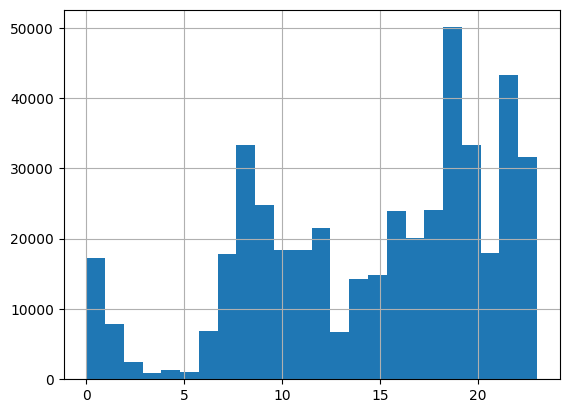

In [21]:
#arrval time analysis
test_df = df.copy()
test_df['Arrival_Time'] = test_df['Arrival Time'].str.split('\n').str[0].str.strip()
test_df['arrival_Time'] = pd.to_datetime(test_df['Arrival_Time'], format='%H:%M').dt.hour
test_df['arrival_Time'].hist(bins=24)

### Data Preprocessing & Cleaning

In [24]:
#preprocessing the scraped data

def clean_flight_data(df):

    #Airline Class --> first str component of Airline-Class column; strip() remove all (combinatin) spaces from leading/trailing
    df['Airline-Name']=df['Airline-Class'].str.split('\n').str[0].str.strip()


    df['Class'] = df['Airline-Class'].str.split('\n').str[-1].str.strip()

    #journey date
    df['Date of Journey']=pd.to_datetime(df['Date of Journey'],format='%d/%m/%Y')

    #date of booking
    df['Date of Booking']=pd.to_datetime(df['Date of Booking'],format='%d/%m/%Y')

    #days before flight
    df['days_before_flight']=(df['Date of Journey']-df['Date of Booking']).dt.days

    # day of booking - to test seasonality
    df['journey_day_name']=df['Date of Journey'].dt.day_name()


    # Departure City
    df['Departure City']=df['Departure Time'].str.split('\n').str[1].str.strip()

    # Arrival City
    df['Arrival City']=df['Arrival Time'].str.split('\n').str[1].str.strip()


    #TotalStops Cleanup
    df['Total Stops'] = df['Total Stops'].str.replace(r'\n\s*\t*', '', regex=True)
    df['Total Stops'] = df['Total Stops'].str.replace(r'(stop).*', r'\1', regex=True)

    #Departure Time
    df['Departure_Time']=df['Departure Time'].str.split('\n').str[0].str.strip()

    #Arrival Time
    df['Arrival_Time']=df['Arrival Time'].str.split('\n').str[0].str.strip()

    #Duration -->: convert the str to hours(float)
    df['Duration'] = df['Duration'].str.extract(r'(\d+)h (\d+)m') \
                                     .astype(float) \
                                     .apply(lambda x: round(x[0] + x[1] / 60, 4), axis=1)
    # Extract hour from 'arrival' column
    df['arrival_time'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M').dt.hour

    # Categorize arrivals -- this is a little bit arbitrary
    # df['arrival_category'] = df['arrival_time'].apply(lambda x: 'Before 7pm' if x < 19 else 'After 7pm')

    df['arrival_category'] = df['arrival_time'].apply(lambda x: 'Normal' if 9 < x < 20 else 'Abnormal')

    #drop columns
    df.drop(['Date of Booking','Date of Journey','Airline-Class','Departure Time','Arrival Time','arrival_time'],axis=1,inplace=True)

    df['Price'] = df['Price'].replace(',', '', regex=True).astype(int)
    return df

In [25]:
df_c = clean_flight_data(df)

In [26]:
df_c.sample(5)

,Duration,Total Stops,Price,Airline-Name,Class,days_before_flight,journey_day_name,Departure City,Arrival City,Departure_Time,Arrival_Time,arrival_category
78495,9.6667,1-stop,9367,Indigo,ECONOMY,26,Friday,Delhi,Ahmedabad,13:00,22:40,Abnormal
242206,16.6667,1-stop,47821,Air India,BUSINESS,19,Friday,Hyderabad,Delhi,05:55,22:35,Abnormal
268248,21.8333,1-stop,5696,Air India,ECONOMY,35,Sunday,Hyderabad,Bangalore,13:15,11:05,Normal
322597,33.5000,2+-stop,13609,Vistara,ECONOMY,21,Sunday,Kolkata,Bangalore,15:20,00:50,Abnormal
56511,24.0833,1-stop,53209,Vistara,BUSINESS,34,Saturday,Delhi,Kolkata,19:45,19:50,Normal


### EDA

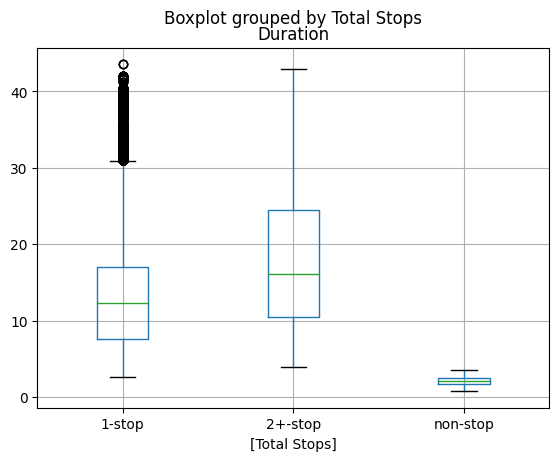

In [33]:
# fig = px.box(df_c, x='Total Stops',y='Duration') #relationship between stops and duration

box_stop_duration = df_c.boxplot(column=['Duration'], by=['Total Stops'])

# Show the plot
# fig.show()

<Axes: xlabel='Duration', ylabel='Price'>

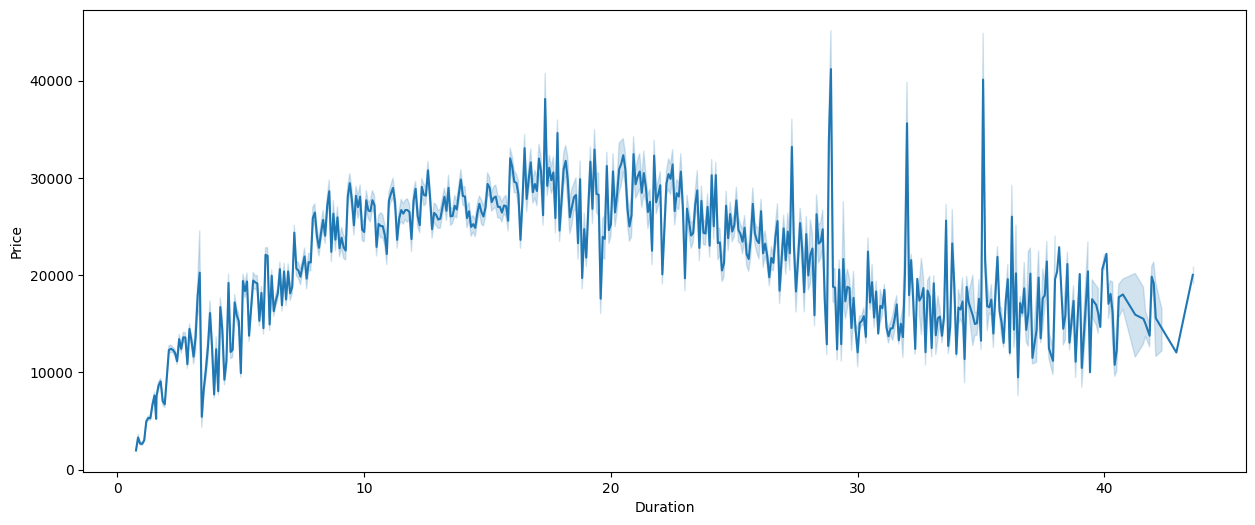

In [34]:
plt.figure(figsize=(15,6))

sns.lineplot(data=df_c,x='Duration',y='Price')

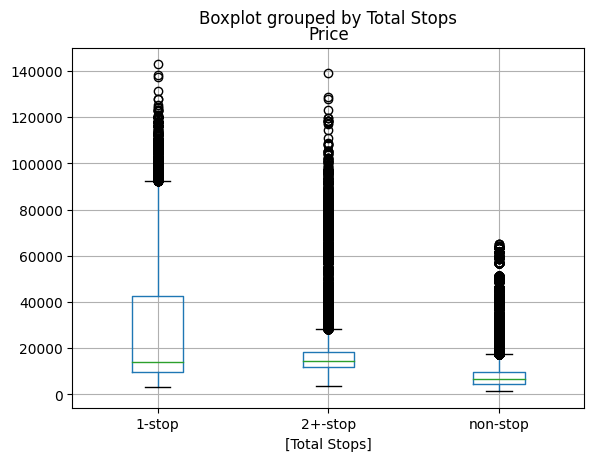

In [40]:
## Total Stops
# import plotly.offline as pyo
# import plotly.graph_objs as go
# # Set notebook mode to work in offline
# pyo.init_notebook_mode()

box_stop_duration = df_c.boxplot(column=['Price'], by=['Total Stops'])
# Show the plo

<Axes: xlabel='Duration', ylabel='Price'>

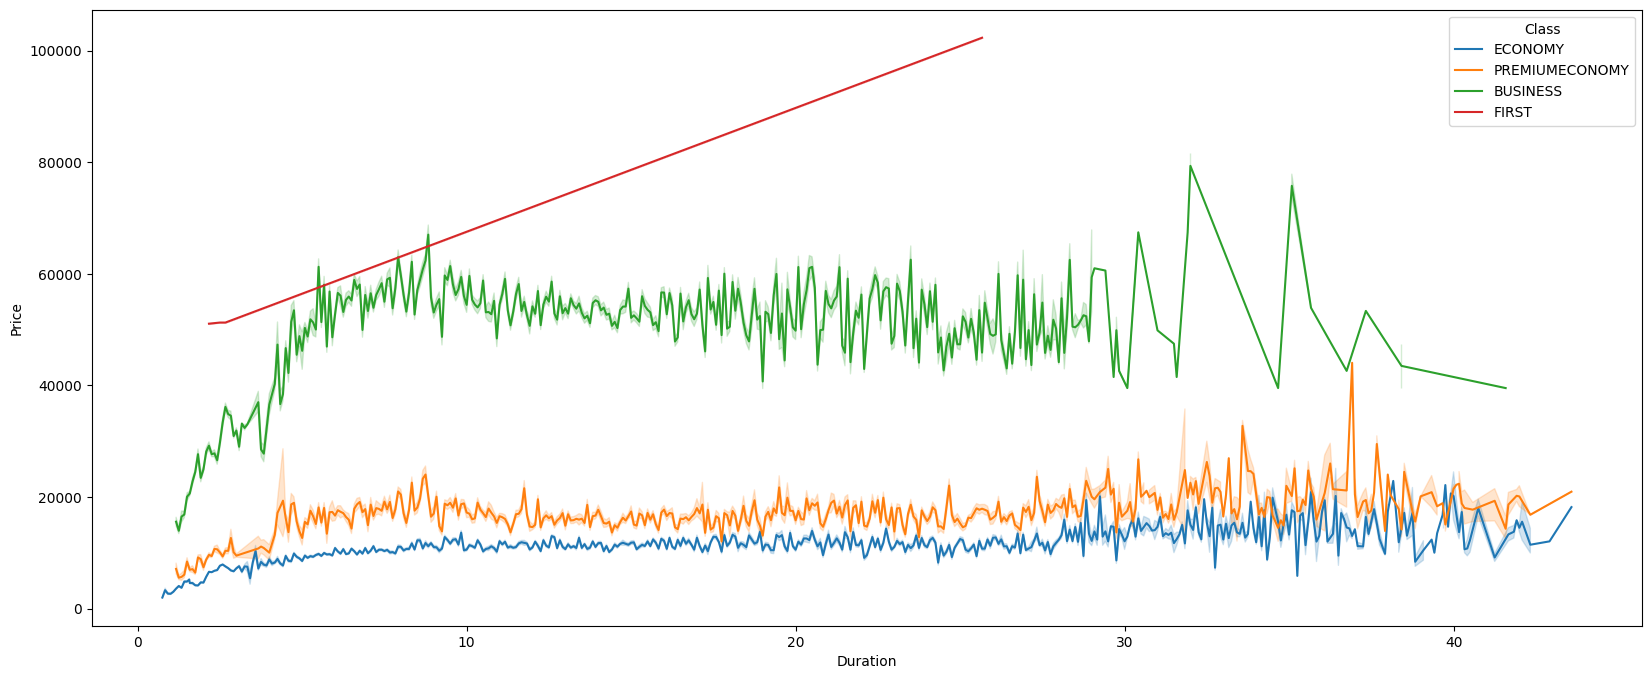

In [41]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='Duration',y='Price',hue='Class')

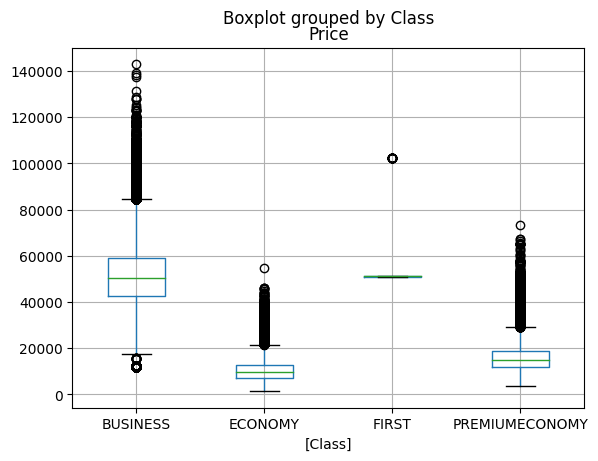

In [42]:
box_stop_duration = df_c.boxplot(column=['Price'], by=['Class'])

<Axes: xlabel='Price', ylabel='Density'>

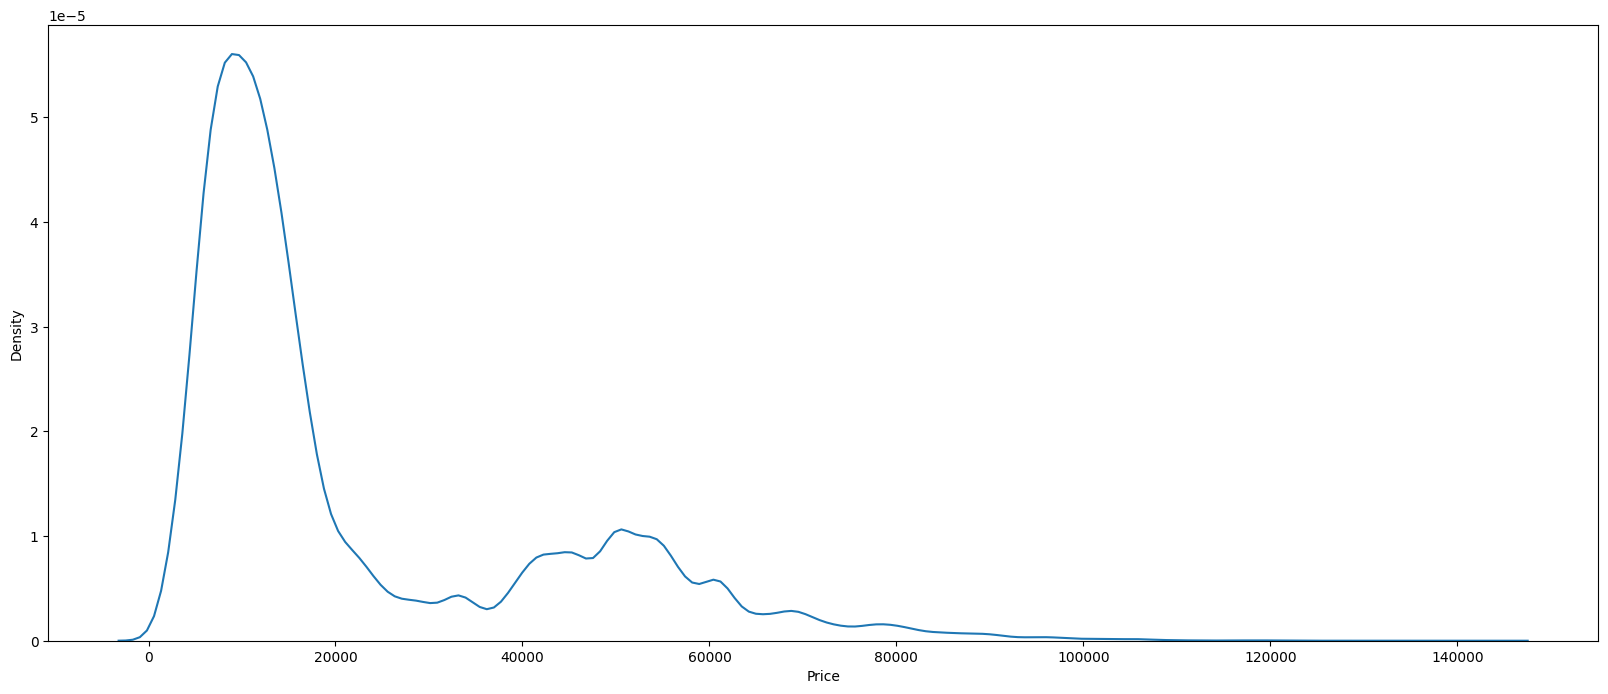

In [44]:
plt.figure(figsize=(20,8))
sns.kdeplot(data=df_c, x="Price") #basically look at the distribution

<Axes: xlabel='Price', ylabel='Density'>

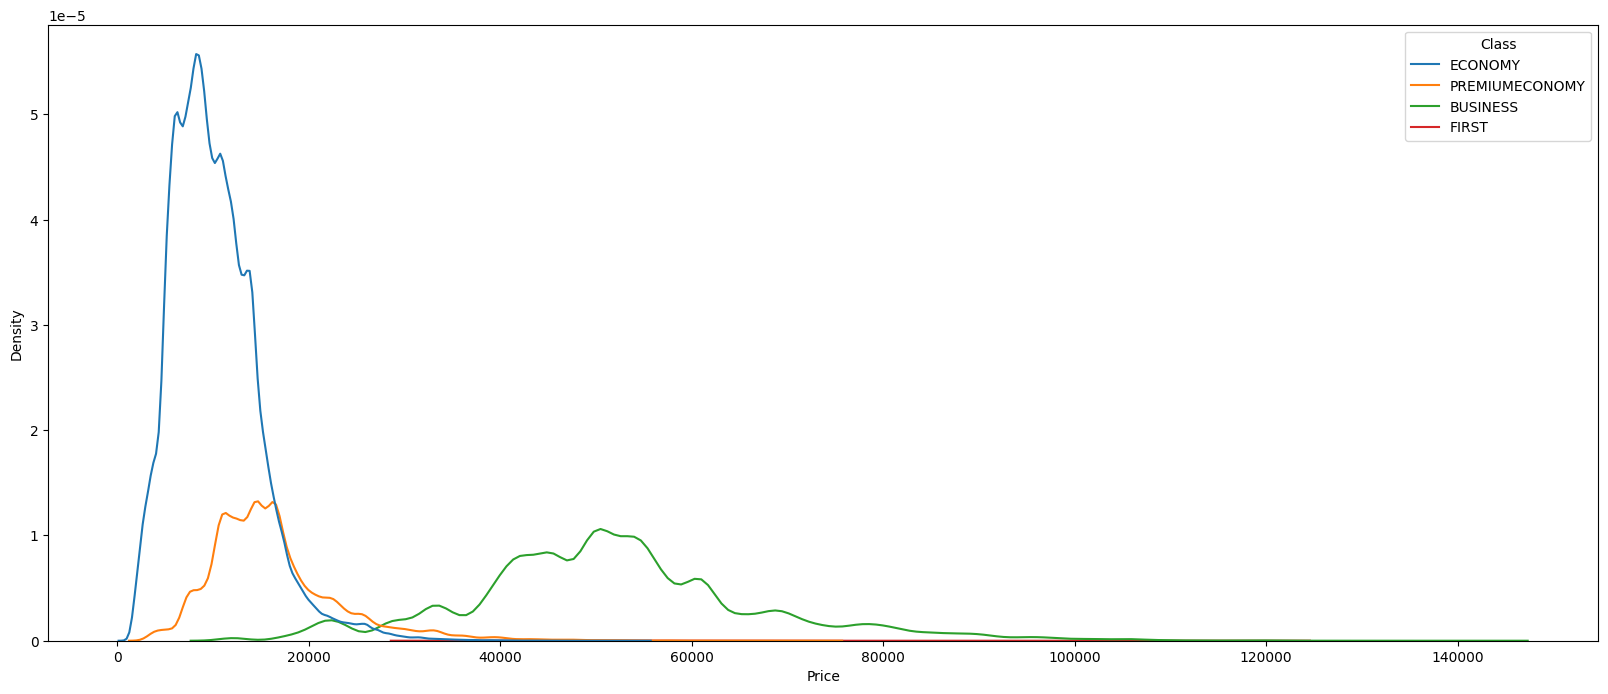

In [45]:
plt.figure(figsize=(20,8))
sns.kdeplot(data=df_c, x="Price",hue='Class')

<Axes: xlabel='days_before_flight', ylabel='Price'>

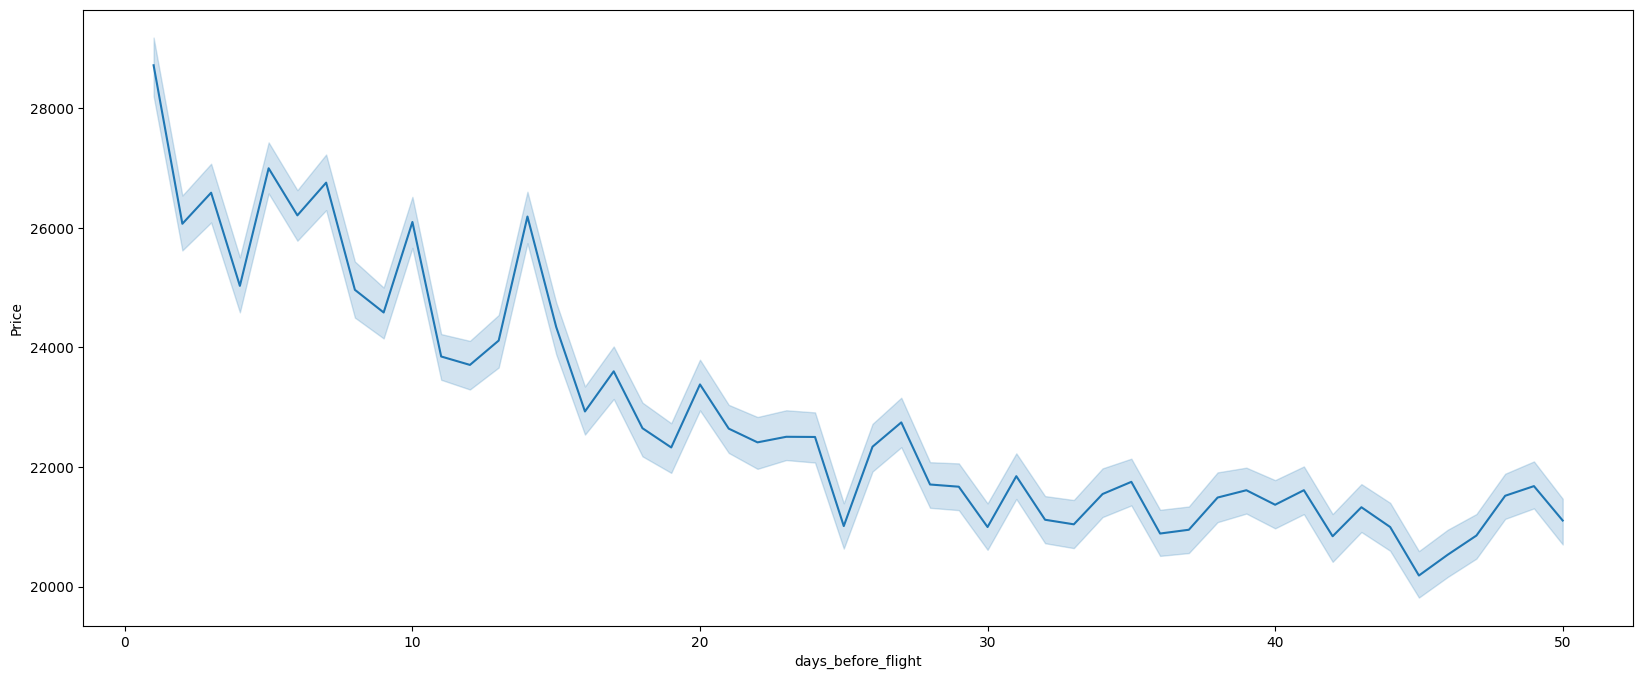

In [46]:
# days before flight
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_before_flight',y='Price')

<Axes: xlabel='days_before_flight', ylabel='Price'>

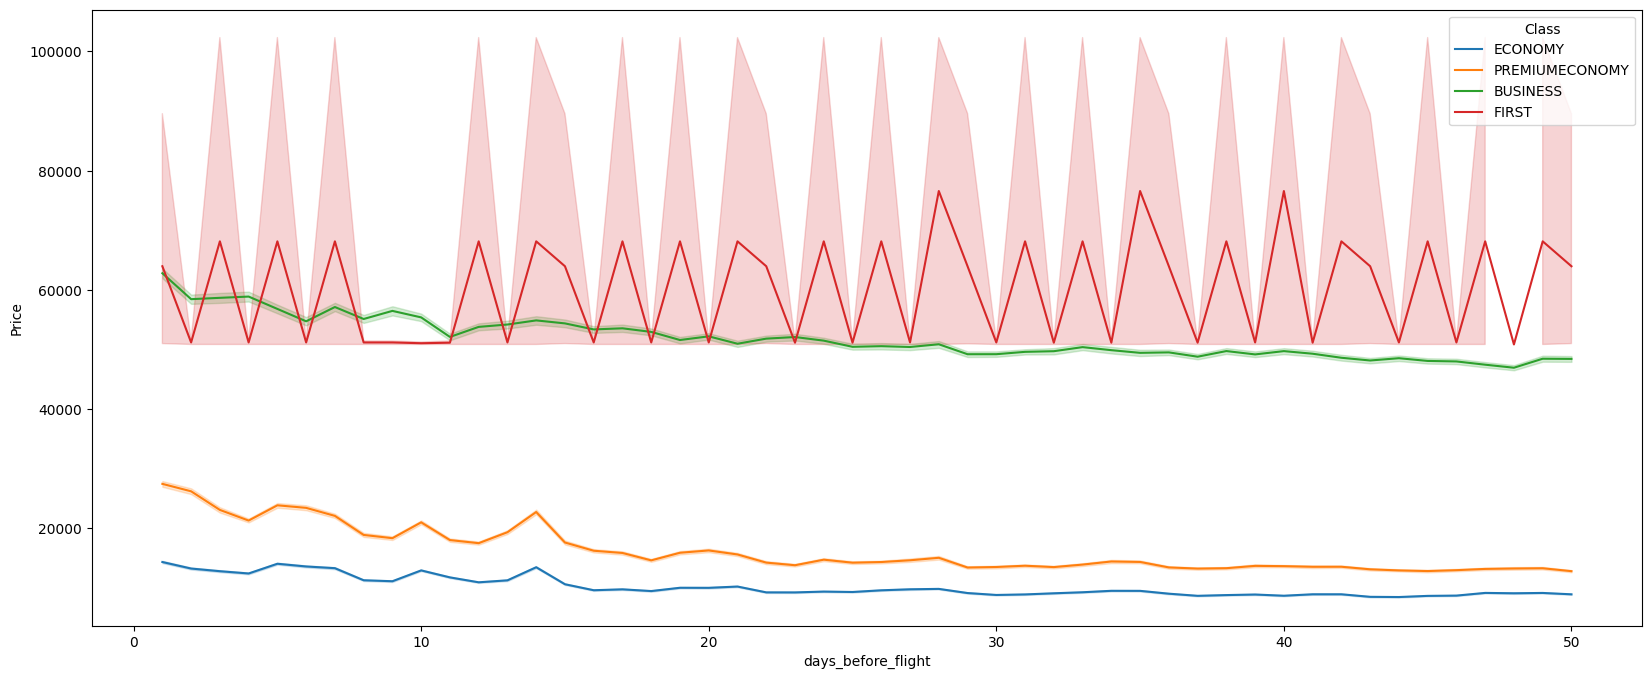

In [47]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_before_flight',y='Price',hue='Class')

<Axes: >

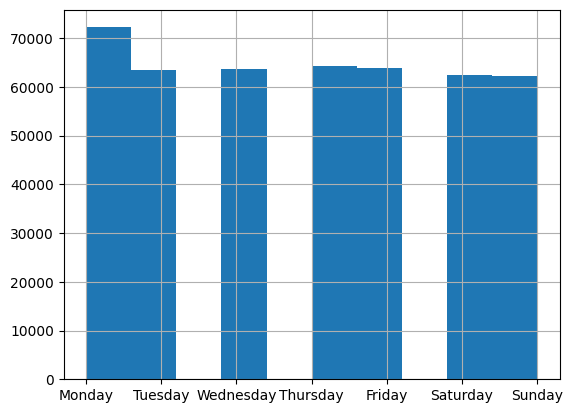

In [48]:
df_c['journey_day_name'].hist()


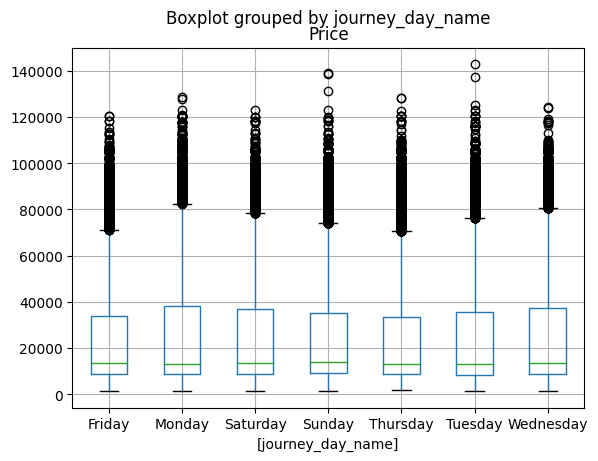

In [51]:
box_day_price = df_c.boxplot(column=['Price'], by =['journey_day_name'])



<Axes: title={'center': 'Price'}, xlabel='[Airline-Name]'>

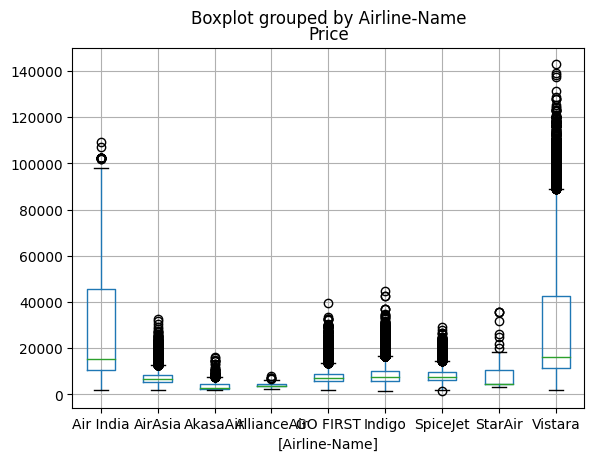

In [53]:
#by airline name
df_c.boxplot(by=['Airline-Name'],column=['Price'])



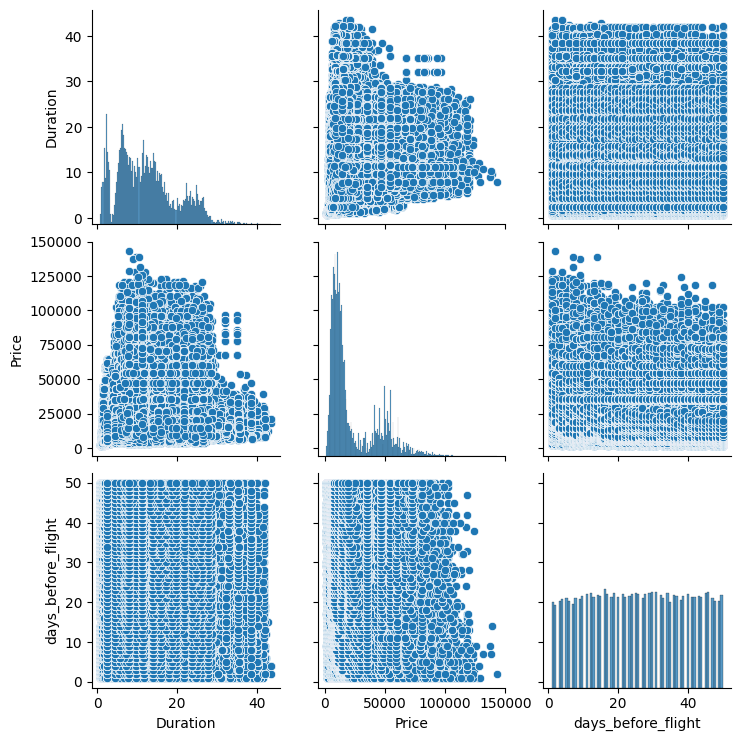

In [55]:
sns.pairplot(df_c)

### Feature Engineer

In [ ]:
def feat_eng(df):
    #concatenate route
    df['Route'] = df['Departure City'] + ' -> ' + df['Arrival City']

    #drop appended columns above
    df.drop(['Departure City','Arrival City'],axis=1,inplace=True)


    ## Convert Departure and Arrival to the hr
    df['Departure_Time_hr']=pd.to_datetime(df['Departure_Time'], format='%H:%M').dt.hour
    df['Arrival_Time_hr']=pd.to_datetime(df['Arrival_Time'], format='%H:%M').dt.hour

    df.drop(['Departure_Time','Arrival_Time'],axis=1,inplace=True)

    return(df)